In [13]:
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

In [14]:
vols = [ 0.3, 0.06 ]
dailyVols = vols / np.sqrt( 252 )
corr = -0.4
covars = [ 
    [ dailyVols[ 0 ] ** 2, dailyVols[ 0 ] * dailyVols[ 1 ] * corr ],
    [ dailyVols[ 0 ] * dailyVols[ 1 ] * corr, dailyVols[ 1 ] ** 2 ]
]
randomSeries = np.random.multivariate_normal( ( 0.001, 0 ), covars, 500 ).T

In [15]:
randomSeries

array([[-1.67631929e-02, -1.51976640e-02,  1.00053208e-02,
        -6.05367049e-03,  3.36765069e-02, -1.00209842e-02,
        -3.93757031e-02,  1.92482765e-03,  9.28955560e-03,
        -7.31698101e-03, -1.54960700e-02,  4.43895775e-02,
         1.16169949e-02,  5.19257168e-02, -2.00437817e-03,
        -4.49156247e-04, -9.98070925e-03,  5.75345927e-03,
         2.16538287e-03, -1.77181593e-02,  3.10713153e-03,
        -1.64365975e-02,  2.91312826e-03,  1.70591524e-02,
         1.54233884e-02,  7.41410932e-03, -2.00678960e-02,
         7.07047183e-03, -1.06358130e-03, -2.44711329e-03,
        -2.51844578e-03,  2.75646636e-02, -4.74373874e-02,
        -9.91343722e-03, -1.38111473e-02,  2.39969670e-04,
        -2.72610953e-02,  1.38477947e-02, -1.11975578e-02,
        -1.34687936e-02,  2.51168232e-02, -2.37744678e-03,
         5.42173256e-03,  2.11807352e-02,  3.75988476e-02,
        -1.45133298e-02, -1.12205292e-02, -3.93487005e-02,
         2.73446801e-02,  2.71587186e-02,  2.79441011e-0

In [16]:
rtyVol = 0.2 * ( 1 + randomSeries[ 0 ] ).cumprod()
hygPrice = 80 * ( 1 + randomSeries[ 1 ] ).cumprod()

In [17]:
df = pd.DataFrame(np.array([rtyVol, hygPrice]).T, columns=["RTY.3m.Proxy.Implied.Vol", "HYG.spot"])

In [18]:
df.head()

,RTY.3m.Proxy.Implied.Vol,HYG.spot
0,0.196647,80.538616
1,0.193659,80.561496
2,0.195596,80.538307
3,0.194412,80.716425
4,0.200959,80.648373


<Axes: >

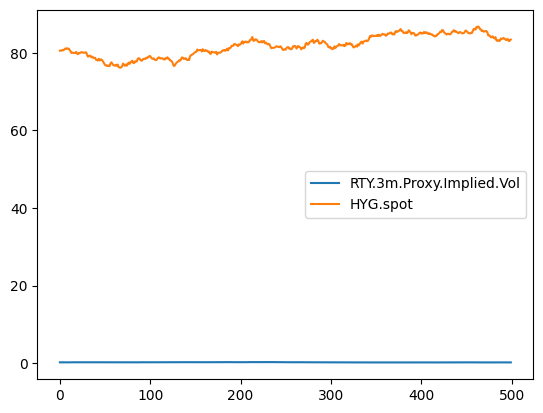

In [19]:
df.plot()

In [20]:
plt.style.use('seaborn')
df.plot(secondary_y=["HYG.spot"], legend=True)

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

<Axes: >

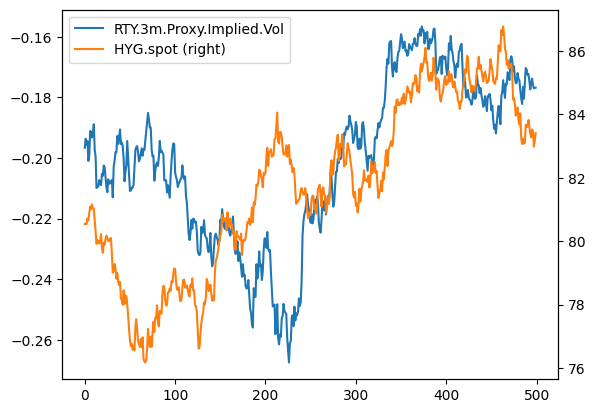

In [21]:
df["RTY.3m.Proxy.Implied.Vol"] = df["RTY.3m.Proxy.Implied.Vol"] * -1
df.plot(secondary_y=["HYG.spot"], legend=True)

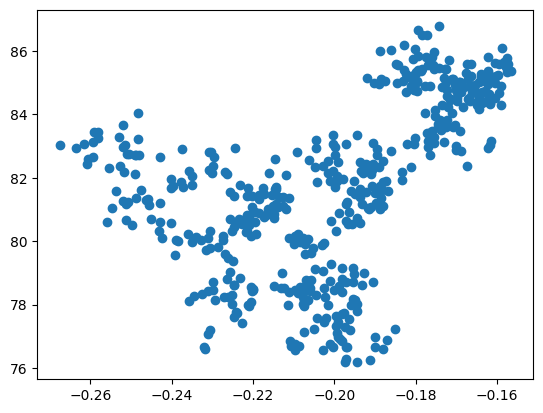

In [22]:
plt.scatter( df[ df.columns[ 0 ] ], df[ df.columns[ 1 ] ] )

<Axes: xlabel='HYG.spot', ylabel='RTY.3m.Proxy.Implied.Vol'>

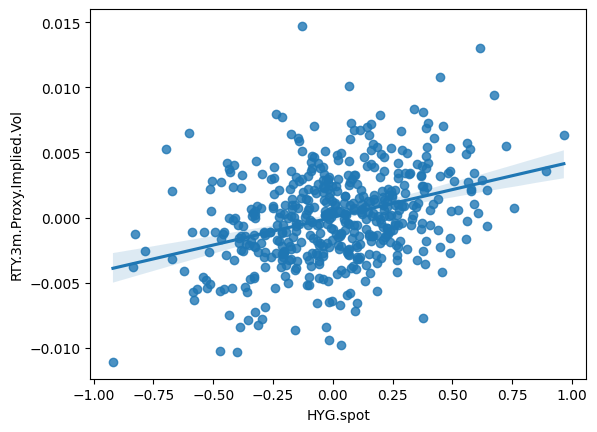

In [23]:
fig, ax = plt.subplots( sharex=True )
sns.regplot( x="HYG.spot", y="RTY.3m.Proxy.Implied.Vol", data=df.diff(), ax=ax )

In [25]:
from scipy import stats

diff = df.diff().dropna()
slope, intercept, rvalue, pvalue, stderr = stats.linregress(diff["HYG.spot"], diff["RTY.3m.Proxy.Implied.Vol"])
print( "R^2 = {r:.3f}".format( r=rvalue ) )
print( 'y = {m:.3f}x {sign} {b:.3f}'.format( m=slope, sign="+" if intercept >= 0 else "-", b=abs(intercept) ) )

R^2 = 0.345
y = 0.004x + 0.000


In [26]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.tools as tls
init_notebook_mode(connected=True)

# Here we can convert our matplotlib object to a plotly object
plotlyFig = tls.mpl_to_plotly(fig)

# Add annotation so you have the regression stats
plotlyFig['layout']['annotations'] = [
    dict(
        x=18,
        y=-2,
        showarrow=False,
        text='R^2 = {:.3f}'.format( rvalue )
    ),
    dict(
        x=18,
        y=-2.6,
        showarrow=False,
        text='y = {m:.3f}x {sign} {b:.3f}'.format( m=slope, sign="+" if intercept >= 0 else "-", b=abs(intercept) )
    )
]
iplot(plotlyFig)

ModuleNotFoundError: No module named 'plotly'

In [27]:
c = [0.8023,0.814,0.8256,0.8372,0.8488,0.8605,0.8721,0.8837,0.8953,0.907,0.9186,0.9302,0.9419,0.9535,0.9651,0.9767,0.9884,1,1.0116,1.0233,1.0349,1.0465,1.0581,1.0698,1.0814,1.093,1.1047,1.1163,1.1279,1.1395,1.1512,1.1628,1.1744,1.186,1.1977,1.2093]
i = [ dt.datetime(2019,8,2),  dt.datetime(2019,8,9),  dt.datetime(2019,8,16),  dt.datetime(2019,8,23),  dt.datetime(2019,8,30),  dt.datetime(2019,9,6),  dt.datetime(2019,9,20),  dt.datetime(2019,10,18),  dt.datetime(2019,11,15),  dt.datetime(2019,12,20),  dt.datetime(2019,12,31),  dt.datetime(2020,1,17),  dt.datetime(2020,3,20),  dt.datetime(2020,3,31),  dt.datetime(2020,6,19) ]
d = [ [0.4244,0.4016,0.3796,0.3584,0.3381,0.3187,0.3002,0.2827,0.2662,0.2508,0.2363,0.2229,0.2105,0.1991,0.1888,0.1794,0.171,0.1636,0.157,0.1513,0.1465,0.1425,0.1393,0.1368,0.135,0.1338,0.1331,0.1329,0.133,0.1334,0.1341,0.135,0.136,0.1372,0.1384,0.1396],
    [0.4006,0.3777,0.3556,0.3343,0.3139,0.2944,0.2759,0.2583,0.2418,0.2263,0.2118,0.1983,0.1859,0.1745,0.1641,0.1547,0.1463,0.1388,0.1322,0.1265,0.1216,0.1176,0.1143,0.1118,0.11,0.1088,0.1081,0.1078,0.108,0.1084,0.1092,0.1101,0.1112,0.1123,0.1136,0.1149],
    [0.3431,0.3257,0.3089,0.2927,0.277,0.2621,0.2477,0.2341,0.2212,0.2089,0.1974,0.1866,0.1765,0.1671,0.1584,0.1504,0.1431,0.1364,0.1303,0.1248,0.1198,0.1154,0.1116,0.1083,0.1055,0.1032,0.1013,0.0998,0.0986,0.0977,0.0971,0.0966,0.0964,0.0963,0.0963,0.0965],
    [0.3124,0.298,0.284,0.2705,0.2574,0.2449,0.2328,0.2213,0.2104,0.1999,0.1901,0.1807,0.1719,0.1637,0.156,0.1488,0.1421,0.136,0.1304,0.1253,0.1206,0.1165,0.1129,0.1098,0.1072,0.1049,0.1031,0.1015,0.1003,0.0994,0.0988,0.0983,0.098,0.0979,0.0978,0.0979],
    [0.2955,0.283,0.2708,0.259,0.2475,0.2365,0.2259,0.2158,0.206,0.1968,0.1879,0.1795,0.1716,0.1641,0.1571,0.1505,0.1443,0.1385,0.1332,0.1284,0.124,0.1201,0.1167,0.1137,0.1111,0.1089,0.1071,0.1056,0.1044,0.1034,0.1027,0.1022,0.1019,0.1018,0.1017,0.1018],
    [0.2866,0.2752,0.264,0.2532,0.2427,0.2326,0.2228,0.2134,0.2044,0.1958,0.1876,0.1798,0.1724,0.1653,0.1587,0.1524,0.1465,0.141,0.1359,0.1313,0.1271,0.1233,0.12,0.1171,0.1145,0.1124,0.1106,0.1091,0.1079,0.1069,0.1062,0.1057,0.1054,0.1052,0.1051,0.1051],
    [0.2729,0.2632,0.2538,0.2446,0.2357,0.227,0.2187,0.2106,0.2028,0.1954,0.1882,0.1813,0.1748,0.1685,0.1626,0.1569,0.1516,0.1465,0.1418,0.1376,0.1336,0.1301,0.127,0.1242,0.1218,0.1197,0.1179,0.1164,0.1152,0.1143,0.1135,0.113,0.1126,0.1124,0.1122,0.1122],
    [0.2548,0.2473,0.24,0.2329,0.226,0.2192,0.2126,0.2063,0.2001,0.1941,0.1883,0.1827,0.1773,0.1721,0.167,0.1622,0.1576,0.1532,0.149,0.1452,0.1416,0.1383,0.1354,0.1327,0.1303,0.1281,0.1262,0.1246,0.1232,0.122,0.121,0.1202,0.1195,0.119,0.1186,0.1183],
    [0.2482,0.242,0.2359,0.2299,0.2241,0.2184,0.2128,0.2074,0.2021,0.1969,0.1919,0.187,0.1823,0.1777,0.1733,0.169,0.1649,0.1608,0.157,0.1535,0.1501,0.1471,0.1442,0.1415,0.1391,0.1369,0.135,0.1332,0.1316,0.1303,0.1291,0.128,0.1271,0.1263,0.1257,0.1252],
    [0.2331,0.2278,0.2227,0.2176,0.2127,0.2078,0.2031,0.1984,0.1939,0.1895,0.1851,0.1809,0.1768,0.1728,0.1689,0.1652,0.1615,0.158,0.1547,0.1516,0.1486,0.1459,0.1433,0.1409,0.1387,0.1367,0.1349,0.1332,0.1317,0.1303,0.1291,0.128,0.127,0.1261,0.1254,0.1247],
    [0.2313,0.2262,0.2212,0.2163,0.2115,0.2068,0.2022,0.1977,0.1932,0.1889,0.1847,0.1806,0.1766,0.1727,0.1689,0.1653,0.1617,0.1582,0.155,0.152,0.1491,0.1464,0.1438,0.1415,0.1393,0.1373,0.1354,0.1337,0.1322,0.1308,0.1296,0.1284,0.1274,0.1266,0.1258,0.1251],
    [0.2302,0.2253,0.2206,0.216,0.2114,0.2069,0.2026,0.1983,0.1941,0.19,0.186,0.1821,0.1783,0.1745,0.1709,0.1674,0.164,0.1607,0.1576,0.1546,0.1518,0.1492,0.1467,0.1444,0.1423,0.1403,0.1384,0.1367,0.1351,0.1337,0.1324,0.1313,0.1302,0.1293,0.1285,0.1277],
    [0.229,0.2249,0.2209,0.2169,0.213,0.2091,0.2054,0.2017,0.1981,0.1946,0.1911,0.1877,0.1845,0.1812,0.1781,0.175,0.172,0.1691,0.1664,0.1637,0.1611,0.1587,0.1563,0.1541,0.152,0.15,0.148,0.1462,0.1445,0.143,0.1415,0.1401,0.1388,0.1376,0.1365,0.1355],
    [0.2289,0.2249,0.2209,0.2171,0.2133,0.2096,0.2059,0.2023,0.1988,0.1953,0.192,0.1887,0.1855,0.1823,0.1793,0.1763,0.1733,0.1705,0.1678,0.1651,0.1626,0.1602,0.1579,0.1557,0.1535,0.1515,0.1496,0.1478,0.1461,0.1445,0.143,0.1415,0.1402,0.139,0.1379,0.1368],
    [0.2239,0.2207,0.2175,0.2143,0.2112,0.2082,0.2051,0.2022,0.1993,0.1964,0.1936,0.1909,0.1882,0.1855,0.1829,0.1804,0.1779,0.1755,0.1731,0.1708,0.1685,0.1663,0.1642,0.1622,0.1601,0.1582,0.1563,0.1545,0.1527,0.151,0.1494,0.1478,0.1464,0.1449,0.1436,0.1423]
]
df2 = pd.DataFrame(d, columns=c, index=i)

In [28]:
df2.head()

,0.8023,0.8140,0.8256,0.8372,0.8488,0.8605,0.8721,0.8837,0.8953,0.9070,...,1.1047,1.1163,1.1279,1.1395,1.1512,1.1628,1.1744,1.1860,1.1977,1.2093
2019-08-02,0.4244,0.4016,0.3796,0.3584,0.3381,0.3187,0.3002,0.2827,0.2662,0.2508,...,0.1331,0.1329,0.1330,0.1334,0.1341,0.1350,0.1360,0.1372,0.1384,0.1396
2019-08-09,0.4006,0.3777,0.3556,0.3343,0.3139,0.2944,0.2759,0.2583,0.2418,0.2263,...,0.1081,0.1078,0.1080,0.1084,0.1092,0.1101,0.1112,0.1123,0.1136,0.1149
2019-08-16,0.3431,0.3257,0.3089,0.2927,0.2770,0.2621,0.2477,0.2341,0.2212,0.2089,...,0.1013,0.0998,0.0986,0.0977,0.0971,0.0966,0.0964,0.0963,0.0963,0.0965
2019-08-23,0.3124,0.2980,0.2840,0.2705,0.2574,0.2449,0.2328,0.2213,0.2104,0.1999,...,0.1031,0.1015,0.1003,0.0994,0.0988,0.0983,0.0980,0.0979,0.0978,0.0979
2019-08-30,0.2955,0.2830,0.2708,0.2590,0.2475,0.2365,0.2259,0.2158,0.2060,0.1968,...,0.1071,0.1056,0.1044,0.1034,0.1027,0.1022,0.1019,0.1018,0.1017,0.1018


In [29]:
import plotly.graph_objs as go

fig = go.Figure(
    data=[ go.Surface(
        z=df2.values.tolist(),
        y=df2.columns.values,
        x=df2.index.astype(str).values.tolist()
    )],
    layout=dict(
        title = 'Vol Surface', 
        autosize = True,
        width = 900,
        height = 700,
        margin = dict(
            l = 65,
            r = 50,
            b = 65,
            t = 90
        ),
        scene = dict(
            aspectratio = dict(
                x = 1,
                y = 1,
                z = 0.667
            )
        )
    ))

go.FigureWidget(fig)

ModuleNotFoundError: No module named 'plotly'